In [1]:
from matplotlib import pyplot as plt
from collections import Counter
from itertools import chain
import seaborn as sns
import pandas as pd
import json

In [4]:
df = pd.read_csv(r'C:\Temp\movement.csv')
df.head()

,OBJECTID,EVENT_LEN,Shape_Length
0,1,27,282.394666
1,2,6,49.048404
2,3,8,126.509697
3,4,11,54.572642
4,5,4,24.937176


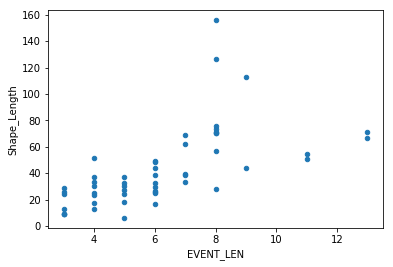

In [13]:
df[df.EVENT_LEN < 14].plot(x="EVENT_LEN", y='Shape_Length', kind='scatter')

In [16]:
def top_keywords(keyword_lists, top=5): 
    
    return Counter(list(chain.from_iterable(keyword_lists))).most_common(top)

In [17]:
events = json.load(open('gdelt_hate.json', 'rb'))

In [18]:
c = 0
for r, a in events.items():
    if a['length'] >= 6:
        c += 1
print(c)

47


In [1]:
events = json.load(open('gdelt_hate.json', 'rb'))
len(events.keys())

NameError: name 'json' is not defined

## General Formatting

In [20]:
events = json.load(open('gdelt_hate.json', 'rb'))
df = pd.DataFrame.from_dict(events).transpose()

a_1 = df['actor_one'].apply(pd.Series)
a_1 = a_1.rename(columns = lambda x : 'a1_' + str(x))
df  = pd.concat([df[:], a_1[:]], axis=1)

a_2 = df['actor_two'].apply(pd.Series)
a_2 = a_2.rename(columns = lambda x : 'a2_' + str(x))
df  = pd.concat([df[:], a_2[:]], axis=1)

keys = df['keywords'].apply(pd.Series)
keys = keys.rename(columns = lambda x : 'k_' + str(x))
df  = pd.concat([df[:], keys[:]], axis=1)

df.reset_index(inplace=True)
df.rename(index=str, columns={"index": "start_end"}, inplace=True)

df['start'] = df['start_end'].apply(lambda x: x[:8])
df['end']   = df['start_end'].apply(lambda x: x[-8:])
df['year']  = df['start_end'].apply(lambda x: x[:4])

df['articles'] = df['articles'].astype('int64')
# df['div_cnt']  = df['div_cnt'].astype('int64')
df['length']   = df['length'].astype('int64')
# df['area']     = df['area'].astype('int64')
df['tone']     = df['tone'].astype('int64')

df.fillna(0)
df.sort_values('start_end', inplace=True)

df

,start_end,actor_one,actor_two,articles,div_cnt,keywords,length,tone,a1_0,a1_1,...,k_7,k_8,k_9,k_10,k_11,k_12,k_13,start,end,year
0,20150314_20150411,"[STUDENT, SIKH, UNITED STATES, SAN FRANCISCO, ...","[UNITED STATES, HINDU, SCHOOL, SAN FRANCISCO, ...",1607,8,"[LAW, INDIANA, STATE, RELIGIOUS, FREEDOM]",27,-4,STUDENT,SIKH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150314,20150411,2015
1,20150413_20150420,"[POLICE, COMMUNITY, POLICE, EMPLOYEE, GOVERNMENT]","[UNITED STATES, TERRORIST, COMMUNITY, NORTH CA...",652,6,"[COLLEGE, SHOOTING, STANCIL, POSSIBLE, COMMUNI...",6,-6,POLICE,COMMUNITY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150413,20150420,2015
2,20150503_20150510,"[COMPANIES, TEXAS, GOVERNMENT, BLOG, UNIVERSITY]","[AMERICAN, ISLAM, POLICE, TEXAS, TEXAS]",267,7,"[SPEECH, TEXAS, GELLER, MUSLIM, RIGHT, EVENT, ...",8,-5,COMPANIES,TEXAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150503,20150510,2015
3,20150617_20150627,"[POLICE, POLICE, MAYOR, POLICE OFFICER, POLICE]","[MALE, SOUTH CAROLINA, POLICE, AFRICA, TELEVIS...",15581,2,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]",11,-6,POLICE,POLICE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150617,20150627,2015
4,20150630_20150703,"[UNITED STATES, UNITED STATES, MUSLIM, AUTHORI...","[JEWISH, THE ASSOCIATED PRESS, SIKH, UNITED ST...",849,3,"[CHURCH, BLACK, FIRES, CHURCHES, SOUTH]",4,-6,UNITED STATES,UNITED STATES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150630,20150703,2015
5,20150728_20150811,"[AFRICA, THE US, AFRICA, ASSOCIATED PRESS, SEA...","[SOUTH CAROLINA, MUSLIM, SOUTH CAROLINA, FEDER...",737,7,"[CHURCH, FEDERAL, STATE, WHITE, GUILTY, CONFED...",14,-5,AFRICA,THE US,...,ROOF,FLAG,SOUTH,COURT,MAN,NaN,NaN,20150728,20150811,2015
6,20150817_20150829,"[FEDERAL COURT, PRESIDENT, FIGHTER, SCIENTIST,...","[UNITED STATES, DALLAS, KANSAS CITY, WSPA, UNI...",422,8,"[MUSLIM, MAN, WHITE, FBI, COMMUNITY, WOMEN, RI...",13,-5,FEDERAL COURT,PRESIDENT,...,STATE,QUENTIN,TARANTINO,COUNTRY,NaN,NaN,NaN,20150817,20150829,2015
7,20150902_20150904,"[MUSLIM, MUSLIM, TARA, NEW YORK, POLICE]","[ALABAMA, ALABAMA, STUDENT, MAGAZINE, PABLO MA...",445,6,"[BLACK, LIVES, MATTER, MAN, WHITE, INSULTS, TH...",3,-6,MUSLIM,MUSLIM,...,CITY,RACIAL,CHURCH,STATE,ALABAMA,COUNTY,MEN,20150902,20150904,2015
8,20150909_20150913,"[ASSAILANT, ASSAILANT, CHICAGO, POLICE CHIEF, ...","[CHICAGO, CHICAGO, ASSAILANT, SIKH, AMERICAN]",555,5,"[SIKH, MUKKER, COUNTRY, SIKHAMERICAN, CAR, LAD...",5,-8,ASSAILANT,ASSAILANT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150909,20150913,2015
9,20150915_20150917,"[WASHINGTON, SIKH, NEWSPAPER, CHICAGO, AMERICAN]","[SIKH, TERRORIST, UNITED STATES, SIKH, PRISON]",494,8,"[SIKH, MAN, SINGH, ELDERLY, GARCIA, COMMUNITY,...",3,-7,WASHINGTON,SIKH,...,YOURE,NaN,NaN,NaN,NaN,NaN,NaN,20150915,20150917,2015


In [21]:
# df = df[df.start_end != '20150617_20150627']  # Dylan Roof Shooting
# df = df[df.start_end != '20170802_20170904']  # Unite the Right

## Yearly Statistics and Plots Over Time

In [22]:
gb = df.groupby('year').agg(['mean', 'median', 'min', 'max', 'count'])
gb.to_csv('yearly_agg.csv')
gb

articles                               length                       \
             mean  median  min    max count       mean median min max count   
year                                                                          
2015  2241.461538   737.0  267  15581    13  13.000000      8   3  46    13   
2016  1774.750000   916.5  286   7490    20   7.450000      6   3  23    20   
2017  2662.904762   966.0  272  17702    21  10.666667      6   3  34    21   
2018  2029.733333  1647.0  301   8782    15  12.133333      8   3  42    15   

          tone                       
          mean median min max count  
year                                 
2015 -5.769231   -6.0  -8  -4    13  
2016 -5.450000   -5.5  -6  -4    20  
2017 -5.857143   -6.0  -8  -4    21  
2018 -5.933333   -6.0  -7  -5    15

KeyError: 'area'

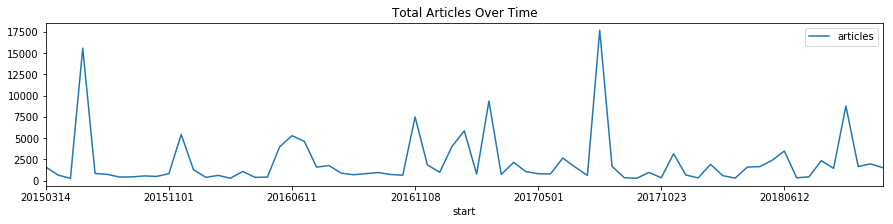

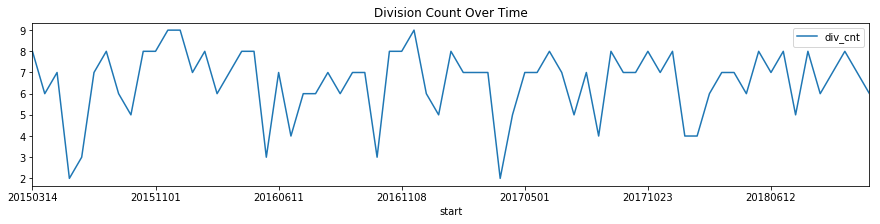

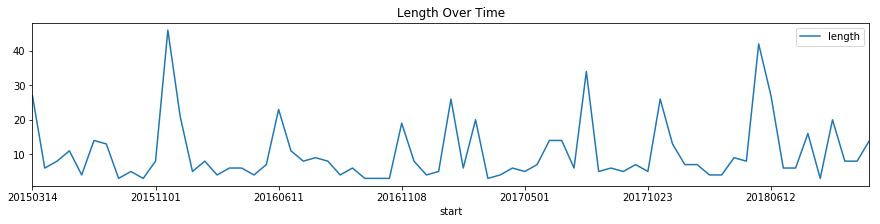

In [23]:
df.plot(x='start', y='articles', title='Total Articles Over Time', figsize=(15, 3))
df.plot(x='start', y='div_cnt', title='Division Count Over Time', figsize=(15, 3))
df.plot(x='start', y='length', title='Length Over Time', figsize=(15, 3))
df.plot(x='start', y='area', title='Area Over Time', figsize=(15, 3))
df.plot(x='start', y='tone', title='Tone Over Time', figsize=(15, 3))

## Top Keyword Statistics and Plots

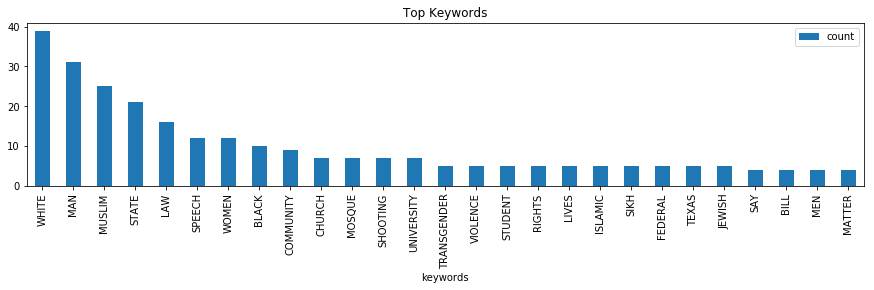

In [24]:
all_keywords = list(chain(*[k['keywords'] for k in events.values()]))

top_keys = [c for c in Counter(all_keywords).most_common(20)]

tk_df = pd.DataFrame([[a, b] for a, b in Counter(all_keywords).items()], columns=['keywords', 'count'])
tk_df = tk_df[tk_df['count'] >= 4]

tk_df.sort_values('count', inplace=True, ascending=False)
tk_df.plot(x='keywords', y='count', kind='bar', title='Top Keywords', figsize=(15, 3))

In [25]:
k_df_list = []
for keyword in tk_df.keywords:
    k_df = df[df.keywords.apply(lambda x: keyword in x)][['articles', 'length', 'area', 'div_cnt', 'tone']]
    k_df = k_df.agg(['mean', 'median', 'min', 'max'])
    k_df['keyword'] = keyword
    k_df_list.append(k_df)

KeyError: "['area'] not in index"

In [ ]:
for i in range(2, 10):
    div_df = df[df.div_cnt == i]
    top = top_keywords(div_df.keywords, 10)
    x = pd.DataFrame(top, columns=['keyword', 'count'])
    x.plot(x='keyword', y='count', kind='bar', title=f'{i} - {len(div_df)}', figsize=(15, 3))

In [ ]:
d_df = df[df.div_cnt > 3]
d_df = df[df.div_cnt <= 6]
d_df

In [ ]:
k_m = pd.concat(k_df_list)
k_m.head(n=10)

In [ ]:
k_median = k_m.loc['max']
k_median.sort_values('div_cnt', ascending=False)

In [ ]:
metrics = ['articles', 'length', 'area', 'tone']
keyword_data = []

for keyword in top_keys:
    
    key_df = df[df.keywords.apply(lambda x: keyword[0] in x)][metrics]
    
    agg_df = key_df.agg(['median'])
    
    keyword_data.append([
        keyword, 
        len(key_df), 
        len(key_df) / len(events.keys()) * 100, 
        *agg_df.values.tolist()[0]
    ])
    
summary = pd.DataFrame(keyword_data, columns=['keyword', 'count', 'percent'] + metrics)

## Compare Keyword Sample Metrics

In [ ]:
tk = [t[0] for t in top_keys]

data = []

for row_k in tk:
    
    row_vals = []
    
    for col_k in tk:
        
        df_a = df[df.keywords.apply(lambda x: row_k in x)]
        df_b = df_a[df_a.keywords.apply(lambda x: col_k in x)]
        perc = int((len(df_b) / len(df_a)) * 100)
        row_vals.append(perc)
        
    data.append(row_vals)
    
d = pd.DataFrame(data, index=[*tk], columns=[*tk])

In [ ]:
plt.figure(figsize=(15, 10))

corr = d.corr()
ax = sns.heatmap(corr, center=0,cmap='bone_r', square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');